# Aula 1: Ciência de Dados e suas etapas

Francisco Aparecido Rodrigues, francisco@icmc.usp.br.<br>
Universidade de São Paulo, São Carlos, Brasil.<br>
Copyright (c) 2020.

Nesta aula, vamos mostrar como descrevemos os dados em termos de medidas de estatística. Medidas de posição, dispersão e correlação serão cobertas, com aplicações em diferentes conjuntos de dados.

## Medidas de posição

### Moda

Uma medida importante de tendência central é a moda, que retorna o elemento mais comum em um conjunto de dados. Geralmente, essa medida é usada para atributos nominais.<br> 
Vamos considerar um exemplo.

In [1]:
import numpy as np 
X = [0,1,1,2,2,2,3,3]
print('X:', X)

X: [0, 1, 1, 2, 2, 2, 3, 3]


Para calcularmos a moda, usamos o pacote Statistics:

In [2]:
from statistics import mode
m = mode(X)
print('A moda de X:', m)

A moda de X: 2


Podemos também identificar a moda visualmente em um gráfico de barras, que representa o valor mais frequente.

X: [0, 1, 1, 2, 2, 2, 3, 3]
Valores possíveis: [0 1 2 3]
Frequencia dos valores: [1. 2. 3. 2.]


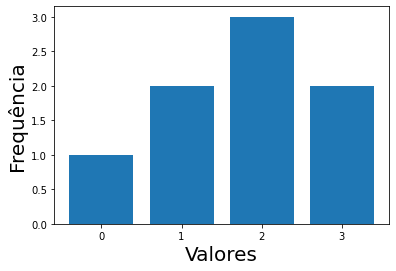

In [3]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

# Usamos a funções sort e unique do Numpy para encontrar os valores possíveis em ordem crescente.
# esses valores serão mostrados na abscissa do gráfico.
values = np.sort(np.unique(X)) 
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(X)):
        if(X[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('X:',X)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xlabel("Valores",fontsize = 20) 
plt.ylabel("Frequência", fontsize = 20) 


plt.show()

Podemos aplicar a função em dados nominais:

In [4]:
Y = ["red", "blue", "blue", "red", "green", "red", "red"]
print('A moda de Y:', mode(Y))

A moda de Y: red


O gráfico de barras mostrando a frequêbncia:

Y: ['red', 'blue', 'blue', 'red', 'green', 'red', 'red']
Valores possíveis: ['blue' 'green' 'red']
Frequencia dos valores: [2. 1. 4.]


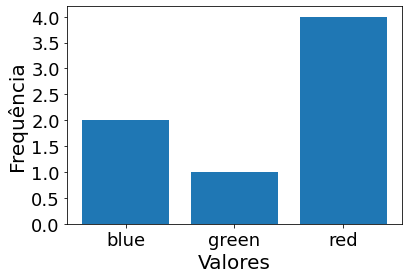

In [5]:
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos
values = np.sort(np.unique(Y)) #usamos a funções sort e unique do Numpy para encontrar os valores possíveis.
# vamos calcular a frequência de cada valor presente na lista
freq = np.zeros(len(values)) # armazena as frequencias
ind = 0 # indice do vetor de frequências
for i in values: # para os valores diferentes
    counter = 0 # conta as ocorrências
    for j in range(0,len(Y)):
        if(Y[j] == i):
            counter = counter + 1
    freq[ind] = counter
    ind = ind + 1

print('Y:',Y)
print('Valores possíveis:', values)
print('Frequencia dos valores:', freq)

y_pos = np.arange(len(values))
plt.xticks(y_pos, values)
plt.bar(y_pos, freq)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Valores",fontsize = 20) 
plt.ylabel("Frequência", fontsize = 20) 
plt.show()

### Média e Mediana

A média e mediana são medidas de tendência central usadas para dados quantitativos. Assim, a média:

In [6]:
import numpy as np 
X = [1,1,1,2,2,3,4,5,5,5]
mx = np.mean(X)
print('X:', X)
print('A média:', mx)

X: [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A média: 2.9


No caso da mediana:

In [7]:
md = np.median(X)
print('X:', X)
print('A mediana:', md)

X: [1, 1, 1, 2, 2, 3, 4, 5, 5, 5]
A mediana: 2.5


Se adicionarmos um valor extremo aos dados, vejamos como a média e a mediana se comportam:

In [8]:
X2 = [1,1,1,2,2,3,4,5,5,100]
print('X2:', X2)
print('A nova média:', np.mean(X2))
print('A nova mediana:', np.median(X2))

X2: [1, 1, 1, 2, 2, 3, 4, 5, 5, 100]
A nova média: 12.4
A nova mediana: 2.5


Ou seja, a média é altamente sensível a valores extremos, enquanto que a mediana é mais robusta.

Vamos considerar uma distribuição de probabilidades. Os dados são gerados a partir de distribuições normal e exponencial.

Para a distribuição normal, a média é indicada pela linha contínua e a mediana, pela tracejada.

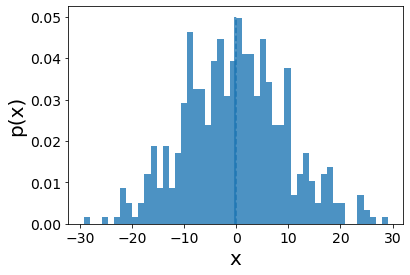

In [13]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

mu = 0 # Média da distribuicao normal
sigma = 10 #desvio padrão da distribuição normal
Y = np.random.normal(mu, sigma, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,0.05)
plt.vlines(md,0,0.05, linestyles = 'dashed')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x",fontsize = 20) 
plt.ylabel("p(x)", fontsize = 20) 
plt.show(True)

Para a distribuição exponencial, a média é indicada pela linha contínua e a mediana, pela tracejada.

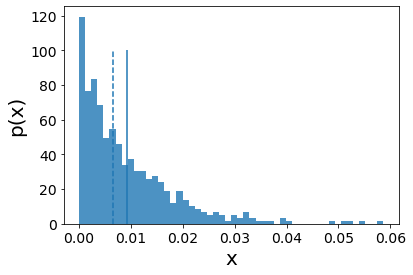

In [14]:
import numpy as np
import matplotlib.pyplot as plt #biblioteca gráfica para mostrar os gráficos

lbda = 100 # taxa da distribuição exponencial
beta = 1.0/lbda

Y = np.random.exponential(beta, 500)
plt.hist(Y, density=True, bins=50,lw=0,alpha=.8)

m = np.mean(Y)
md = np.median(Y)
plt.vlines(m,0,lbda)
plt.vlines(md,0,lbda, linestyles = 'dashed')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("x",fontsize = 20) 
plt.ylabel("p(x)", fontsize = 20) 

plt.show(True)

Notamos que a média é similar à mediana se a distribuição é praticamente simétrica em relação à média. Caso a distribuição não seja simétrica, o mais adequado é usar a mediana como medida central.

## Medidas de dispersão

As medidas de dispersão mais usadas são a variância e o desvio padrão. A distância interquantil (IQR) também é bastante usada e quantifica a diferença entre o terceiro e primeiro quantil. Já a amplitude simplesmente mede a diferença entre os valores máximo e mínimo.

In [16]:
from scipy.stats import iqr

def variancia(X):
    m = np.mean(X)
    N = len(X)
    s = 0
    for i in np.arange(0, len(X)):
        s = s + (X[i]-m)**2
    s = s/(N-1)
    return s

X = [0, 0, 1, 1, 18]
Y = [4, 4, 4, 4, 4]
mx = np.mean(X)
my = np.mean(Y)
print('X:', X)
print('Média de X:', mx)
print('Variância de X:', variancia(X))
print('IQR de X:', iqr(X))
print('Amplitude de X:', np.max(X)-np.min(X))

print('\n')
print('Y:', Y)
print('Média de Y:', my)
print('Variância de Y:', variancia(Y))
print('IQR de Y:', iqr(Y))
print('Amplitude de Y:', np.max(Y)-np.min(Y))

X: [0, 0, 1, 1, 18]
Média de X: 4.0
Variância de X: 61.5
IQR de X: 1.0
Amplitude de X: 18


Y: [4, 4, 4, 4, 4]
Média de Y: 4.0
Variância de Y: 0.0
IQR de Y: 0.0
Amplitude de Y: 0


Notem que os dados acima possuem a mesma média, mas a variância é bastante diferente.

## Correlação

Vamos considerar alguns casos para vermos como se comporta o coeficiente de correlação de Pearson de acordo com diferentes tendências entre as variáveis $X$ e $Y$.

[ 0.8         0.78383838  0.76767677  0.75151515  0.73535354  0.71919192
  0.7030303   0.68686869  0.67070707  0.65454545  0.63838384  0.62222222
  0.60606061  0.58989899  0.57373737  0.55757576  0.54141414  0.52525253
  0.50909091  0.49292929  0.47676768  0.46060606  0.44444444  0.42828283
  0.41212121  0.3959596   0.37979798  0.36363636  0.34747475  0.33131313
  0.31515152  0.2989899   0.28282828  0.26666667  0.25050505  0.23434343
  0.21818182  0.2020202   0.18585859  0.16969697  0.15353535  0.13737374
  0.12121212  0.10505051  0.08888889  0.07272727  0.05656566  0.04040404
  0.02424242  0.00808081 -0.00808081 -0.02424242 -0.04040404 -0.05656566
 -0.07272727 -0.08888889 -0.10505051 -0.12121212 -0.13737374 -0.15353535
 -0.16969697 -0.18585859 -0.2020202  -0.21818182 -0.23434343 -0.25050505
 -0.26666667 -0.28282828 -0.2989899  -0.31515152 -0.33131313 -0.34747475
 -0.36363636 -0.37979798 -0.3959596  -0.41212121 -0.42828283 -0.44444444
 -0.46060606 -0.47676768 -0.49292929 -0.50909091 -0

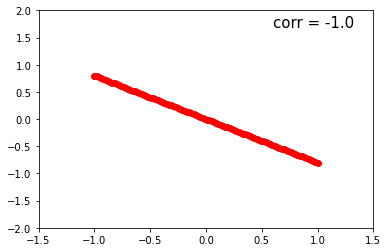

[ 0.61159173  0.58548825  0.90199395  0.8545502   0.55700387  0.786742
  0.66299769  0.70831518  0.59984534  0.82602948  0.47992089  0.58442742
  0.7317282   0.5925855   0.61108814  0.36462891  0.49869042  0.56156527
  0.45204519  0.51063532  0.28481119  0.65598513  0.41617072  0.50870484
  0.37397918  0.37540814  0.34589931  0.22901328  0.22214755  0.19846701
  0.30780593  0.16877821  0.42670757  0.16105144  0.23561753  0.26518124
  0.0785934   0.29896189  0.26340134  0.06278101  0.01370694  0.0874169
  0.2057095   0.01569037 -0.0919277  -0.06259619  0.22636758 -0.12404977
  0.09381744  0.06810505 -0.14022201  0.05692813 -0.13864393  0.05748684
 -0.0501546  -0.07887338 -0.22927125 -0.00885264 -0.01487826 -0.27944047
  0.0028665  -0.10037201 -0.10725422 -0.13775333 -0.23708993 -0.22363713
 -0.11042811 -0.42699634 -0.2454159  -0.47394347 -0.3481431  -0.23794508
 -0.27875977 -0.41374167 -0.2895344  -0.49587915 -0.35341713 -0.41049474
 -0.65103221 -0.39219868 -0.55408952 -0.62970327 -0.37

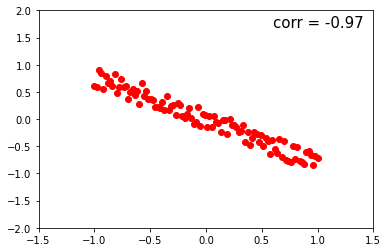

[ 0.42318346  0.38713812  1.03631113  0.95758524  0.3786542   0.85429209
  0.62296507  0.72976168  0.5289836   0.99751351  0.32145795  0.54663262
  0.8573958   0.59527201  0.64843891  0.17168207  0.45596669  0.59787801
  0.39499948  0.52834135  0.09285469  0.85136421  0.38789699  0.58912685
  0.33583716  0.35485668  0.31200064  0.09439019  0.09682034  0.06562088
  0.30046034  0.03856651  0.57058686  0.0554362   0.22073001  0.29601904
 -0.06099501  0.39590359  0.34094409 -0.04413494 -0.12612148  0.03746006
  0.29020688 -0.07366976 -0.27274428 -0.19791966  0.3961695  -0.28850357
  0.16339245  0.1281293  -0.2723632   0.13809867 -0.23688382  0.17153933
 -0.02758192 -0.06885787 -0.353492    0.10350685  0.10761721 -0.40534558
  0.17542997 -0.01488543 -0.01248824 -0.05732485 -0.23983643 -0.19676922
  0.04581045 -0.57116439 -0.1918419  -0.63273543 -0.36497306 -0.12841542
 -0.19388318 -0.44768536 -0.1831092  -0.5796371  -0.27855143 -0.37654503
 -0.84145837 -0.30762968 -0.61524975 -0.75031563 -0

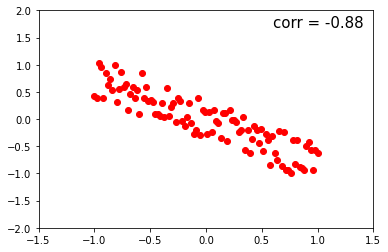

[ 0.23477519  0.18878799  1.17062832  1.06062029  0.20030453  0.92184217
  0.58293245  0.75120817  0.45812187  1.16899754  0.162995    0.50883782
  0.98306339  0.59795852  0.68578968 -0.02126478  0.41324297  0.63419075
  0.33795377  0.54604738 -0.0991018   1.04674328  0.35962327  0.66954886
  0.29769513  0.33430523  0.27810197 -0.04023289 -0.02850686 -0.06722524
  0.29311475 -0.09164518  0.71446615 -0.05017903  0.20584249  0.32685685
 -0.20058342  0.49284528  0.41848684 -0.1510509  -0.2659499  -0.01249678
  0.37470425 -0.1630299  -0.45356087 -0.33324313  0.56597142 -0.45295738
  0.23296746  0.18815355 -0.4045044   0.21926922 -0.33512371  0.28559183
 -0.00500924 -0.05884235 -0.47771275  0.21586633  0.23011269 -0.53125069
  0.34799344  0.07060114  0.08227774  0.02310364 -0.24258293 -0.1699013
  0.20204901 -0.71533245 -0.1382679  -0.79152739 -0.38180302 -0.01888575
 -0.10900659 -0.48162905 -0.07668401 -0.66339504 -0.20368573 -0.34259533
 -1.03188452 -0.22306068 -0.67640998 -0.87092799 -0.

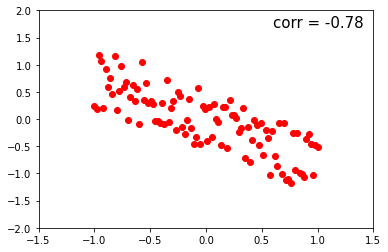

[ 0.04636692 -0.00956214  1.3049455   1.16365533  0.02195486  0.98939225
  0.54289984  0.77265467  0.38726013  1.34048157  0.00453205  0.47104302
  1.10873099  0.60064503  0.72314045 -0.21421162  0.37051925  0.67050349
  0.28090805  0.56375341 -0.29105829  1.24212235  0.33134954  0.74997088
  0.2595531   0.31375377  0.24420331 -0.17485598 -0.15383406 -0.20007137
  0.28576916 -0.22185688  0.85834544 -0.15579426  0.19095496  0.35769465
 -0.34017184  0.58978697  0.49602959 -0.25796685 -0.40577832 -0.06245362
  0.45920163 -0.25239003 -0.63437746 -0.4685666   0.73577335 -0.61741118
  0.30254248  0.24817779 -0.5366456   0.30043977 -0.4333636   0.39964432
  0.01756343 -0.04882684 -0.60193349  0.32822582  0.35260816 -0.6571558
  0.52055691  0.15608772  0.17704373  0.10353212 -0.24532943 -0.14303338
  0.35828757 -0.8595005  -0.0846939  -0.95031935 -0.39863299  0.09064391
 -0.02412999 -0.51557274  0.02974119 -0.74715298 -0.12882003 -0.30864562
 -1.22231067 -0.13849168 -0.7375702  -0.99154035  0.

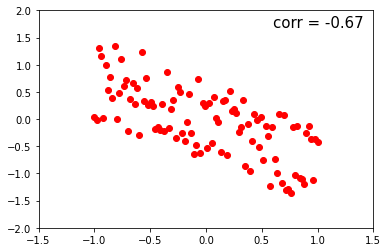

[-0.14204135 -0.20791227  1.43926268  1.26669038 -0.15639481  1.05694233
  0.50286722  0.79410117  0.3163984   1.5119656  -0.15393089  0.43324822
  1.23439858  0.60333154  0.76049122 -0.40715847  0.32779552  0.70681623
  0.22386234  0.58145943 -0.48301478  1.43750142  0.30307582  0.83039289
  0.22141107  0.29320232  0.21030464 -0.30947907 -0.27916126 -0.3329175
  0.27842357 -0.35206857  1.00222473 -0.26140949  0.17606744  0.38853245
 -0.47976025  0.68672866  0.57357235 -0.36488281 -0.54560674 -0.11241046
  0.54369901 -0.34175017 -0.81519405 -0.60389006  0.90557527 -0.78186499
  0.37211749  0.30820204 -0.66878679  0.38161032 -0.53160349  0.51369682
  0.04013611 -0.03881133 -0.72615424  0.4405853   0.47510364 -0.78306091
  0.69312038  0.24157429  0.27180971  0.1839606  -0.24807593 -0.11616546
  0.51452613 -1.00366855 -0.0311199  -1.10911131 -0.41546295  0.20017358
  0.0607466  -0.54951643  0.13616639 -0.83091092 -0.05395433 -0.27469592
 -1.41273683 -0.05392268 -0.79873043 -1.1121527   0.

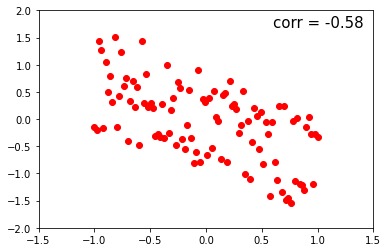

[-0.33044963 -0.4062624   1.57357987  1.36972542 -0.33474447  1.12449242
  0.4628346   0.81554766  0.24553666  1.68344963 -0.31239384  0.39545342
  1.36006618  0.60601805  0.79784199 -0.60010531  0.2850718   0.74312897
  0.16681662  0.59916546 -0.67497127  1.63288049  0.27480209  0.9108149
  0.18326904  0.27265086  0.17640597 -0.44410215 -0.40448847 -0.46576362
  0.27107798 -0.48228026  1.14610402 -0.36702472  0.16117992  0.41937026
 -0.61934866  0.78367035  0.6511151  -0.47179876 -0.68543515 -0.16236729
  0.62819638 -0.4311103  -0.99601063 -0.73921353  1.07537719 -0.94631879
  0.4416925   0.36822629 -0.80092799  0.46278087 -0.62984338  0.62774931
  0.06270878 -0.02879582 -0.85037499  0.55294479  0.59759911 -0.90896602
  0.86568385  0.32706087  0.36657569  0.26438909 -0.25082243 -0.08929755
  0.6707647  -1.14783661  0.0224541  -1.26790327 -0.43229291  0.30970324
  0.14562319 -0.58346012  0.24259158 -0.91466887  0.02091137 -0.24074621
 -1.60316298  0.03064632 -0.85989066 -1.23276506  0.

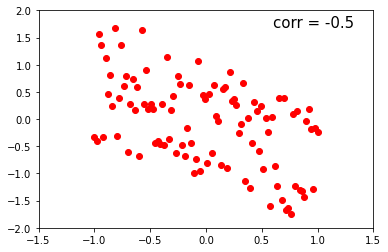

[-0.5188579  -0.60461253  1.70789705  1.47276047 -0.51309414  1.1920425
  0.42280199  0.83699416  0.17467493  1.85493366 -0.47085679  0.35765862
  1.48573377  0.60870456  0.83519276 -0.79305216  0.24234808  0.77944171
  0.10977091  0.61687149 -0.86692776  1.82825957  0.24652837  0.99123691
  0.14512702  0.2520994   0.1425073  -0.57872524 -0.52981567 -0.59860975
  0.26373239 -0.61249196  1.28998331 -0.47263995  0.1462924   0.45020806
 -0.75893708  0.88061205  0.72865785 -0.57871472 -0.82526357 -0.21232413
  0.71269376 -0.52047044 -1.17682722 -0.874537    1.24517912 -1.1107726
  0.51126752  0.42825053 -0.93306919  0.54395142 -0.72808327  0.74180181
  0.08528146 -0.01878031 -0.97459574  0.66530427  0.72009459 -1.03487114
  1.03824732  0.41254744  0.46134167  0.34481757 -0.25356893 -0.06242963
  0.82700326 -1.29200466  0.0760281  -1.42669523 -0.44912288  0.41923291
  0.23049979 -0.61740381  0.34901678 -0.99842681  0.09577707 -0.2067965
 -1.79358914  0.11521532 -0.92105089 -1.35337742  0.54

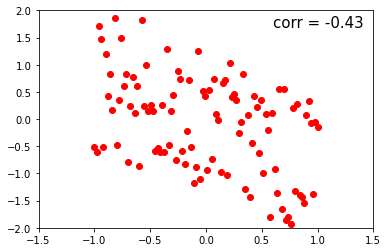

[-0.70726617 -0.80296266  1.84221424  1.57579551 -0.69144381  1.25959258
  0.38276937  0.85844065  0.10381319  2.02641769 -0.62931973  0.31986382
  1.61140136  0.61139107  0.87254353 -0.985999    0.19962435  0.81575446
  0.05272519  0.63457752 -1.05888425  2.02363864  0.21825464  1.07165892
  0.10698499  0.23154795  0.10860863 -0.71334832 -0.65514287 -0.73145587
  0.2563868  -0.74270365  1.4338626  -0.57825519  0.13140488  0.48104586
 -0.89852549  0.97755374  0.8062006  -0.68563067 -0.96509199 -0.26228097
  0.79719114 -0.60983057 -1.35764381 -1.00986047  1.41498104 -1.27522641
  0.58084253  0.48827478 -1.06521038  0.62512197 -0.82632316  0.8558543
  0.10785414 -0.0087648  -1.09881648  0.77766376  0.84259006 -1.16077625
  1.21081079  0.49803402  0.55610766  0.42524606 -0.25631543 -0.03556171
  0.98324182 -1.43617272  0.1296021  -1.58548719 -0.46595284  0.52876257
  0.31537638 -0.65134751  0.45544198 -1.08218475  0.17064277 -0.1728468
 -1.98401529  0.19978432 -0.98221112 -1.47398978  0.6

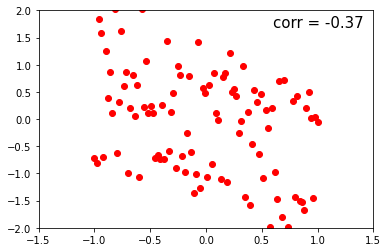

[-8.95674438e-01 -1.00131280e+00  1.97653142e+00  1.67883056e+00
 -8.69793479e-01  1.32714267e+00  3.42736753e-01  8.79887150e-01
  3.29514575e-02  2.19790172e+00 -7.87782681e-01  2.82069024e-01
  1.73706896e+00  6.14077585e-01  9.09894303e-01 -1.17894584e+00
  1.56900630e-01  8.52067197e-01 -4.32052116e-03  6.52283546e-01
 -1.25084074e+00  2.21901771e+00  1.89980915e-01  1.15208093e+00
  6.88429601e-02  2.10996491e-01  7.47099649e-02 -8.47971410e-01
 -7.80470073e-01 -8.64301996e-01  2.49041215e-01 -8.72915346e-01
  1.57774189e+00 -6.83870418e-01  1.16517356e-01  5.11883667e-01
 -1.03811390e+00  1.07449543e+00  8.83743353e-01 -7.92546628e-01
 -1.10492041e+00 -3.12237810e-01  8.81688515e-01 -6.99190704e-01
 -1.53846039e+00 -1.14518393e+00  1.58478296e+00 -1.43968021e+00
  6.50417543e-01  5.48299026e-01 -1.19735158e+00  7.06292520e-01
 -9.24563052e-01  9.69906800e-01  1.30426813e-01  1.25071280e-03
 -1.22303723e+00  8.90023242e-01  9.65085538e-01 -1.28668136e+00
  1.38337426e+00  5.83520

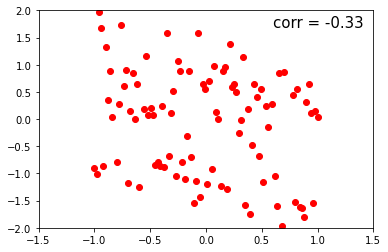

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

N = 100
X = np.linspace(-1,1, N)
# print(X)
erro = np.random.uniform(-1,1,N) # ruído a ser incluído na relação linear.
# print(erro)

for sigma in np.arange(0,2,0.2):
    Y = -0.8*X + erro*sigma
    # print(Y)
    plt.plot(X,Y, 'ro')
    corr, p_value = pearsonr(X, Y) # calcula a correlação
    corr = int(corr*100)/100
    string = 'corr = '+ str(corr)
    plt.xlim(-1.5,1.5)
    plt.ylim(-2, 2)
    plt.text(0.6,1.7, string, fontsize=15)
    plt.show(True)

A medida de correlação é importante para analisar a relação entre as variáveis. Se duas variáveis são altamente correlacionadas, é adequado remover uma delas, de modo a reduzir informação redundante nos dados.

Vamos considerar a base de dados da flor Iris:

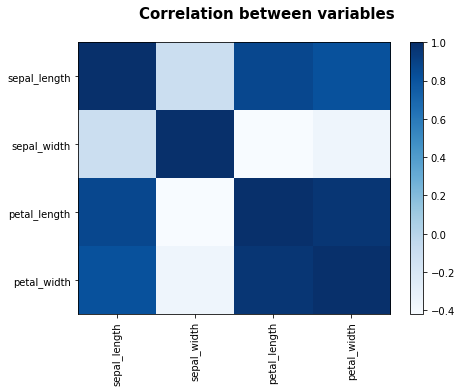

In [22]:
import pandas as pd # biblioteca pandas
data = pd.read_csv('data/iris.csv', header=(0)) # lê os dados a partir do arquivo

corr = data.corr()
#Plot Correlation Matrix using Matplotlib
plt.figure(figsize=(7, 5))
plt.imshow(corr, cmap='Blues', interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlation between variables', fontsize=15, fontweight='bold')
plt.grid(False)
plt.show()

Podemos mostrar a mesma tabela usando a biblioteca Searborn:

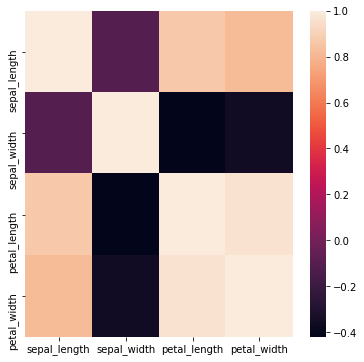

In [23]:
import seaborn as sns
plt.figure(figsize= (6, 6))
sns.heatmap(data.corr())
plt.show(sns)

Para obtermos um resumo das medidas estatística dos dados:

In [24]:
data.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Além do coeficiente de Pearson, podemos considerar o coeficiente de correlação de Spearman:

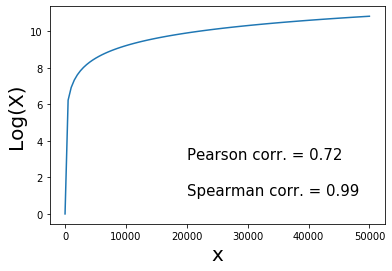

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

N = 100
x = np.linspace(1, 50000, N) 
z = np.log(x)

plt.plot(x, z) 
plt.xlabel("x",fontsize = 20) 
plt.ylabel("Log(X)", fontsize = 20) 
corr, p_value = pearsonr(x, z)
corrs, p_values = spearmanr(x, z)
corr = int(corr*100)/100
corrs = int(corrs*100)/100
string = 'Pearson corr. = '+ str(corr)
plt.text(20000,3, string, fontsize=15)
string = 'Spearman corr. = '+ str(corrs)
plt.text(20000,1, string, fontsize=15)
plt.show()

Notem que nesse caso, os coeficientes de Spearman e Pearson são diferentes. Veja o material da aula teórica.

### Medidas de Entropia

A entropia de Shannon para um dado de N lados:

In [26]:
from scipy.stats import entropy
N = 6
Px = np.ones(N)*1/N
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Entropia de Shannon:  2.584962500721156


Notem que essa entropia é máxima, visto que a distribuição uniforme é a que oferece maior informação e maior dificuldade na previsao. Para um vetor com um único valor, a entropia é mínima (ou seja, um dado com faces iguais).
Vejam o exemplo abaixo para uma moeda cujas probabilidade de sair cara e coroa variam. Modifique os valores e veja o que acontece com a entropia.

In [27]:
from scipy.stats import entropy
Px = [1, 0] # probabilidade de sair cara e coroa
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Px = [0.75, 0.25] # a soma dos elementos do vetor deve ser igual a 1.
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Px = [0.5, 0.5]
H = entropy(Px, base=2) 
print("Entropia de Shannon: ", H)

Entropia de Shannon:  0.0
Entropia de Shannon:  0.8112781244591328
Entropia de Shannon:  1.0


Entropia de relativa (divergência de Kulback-Leibler) pode ser usada para comparar distribuições.

In [28]:
from scipy.stats import entropy
P = [0.25,0.55,0.2]
Q = [0.33, 0.33, 0.33]

print('KL(P,Q) = ', entropy(P,Q, base = np.exp(1)))
print('KL(Q,P) = ', entropy(Q,P, base = np.exp(1)))

KL(P,Q) =  0.10134076548572564
KL(Q,P) =  0.09924413610176085


Se as distribuições forem iguais.

In [29]:
print('KL(P,P) = ', entropy(P,P, base = np.exp(1)))
print('KL(Q,Q) = ', entropy(Q,Q, base = np.exp(1)))

KL(P,P) =  0.0
KL(Q,Q) =  0.0


## Exercícios de fixação

Não é necessário entregar os exercícios abaixo, mas é importante resolvê-los para fixar os conteúdos estudados.

1 -  Considere uma moeda cuja probabilidade de sair cara é $p$. Monte um gráfico da entropia em função do valor de $p$.

2 - Gere dados a partir de uma distribuição de Poisson. Calcula a média e variância e compare seus valores.

3 - Calcula e a divergência de Kullback-Leibler entre as distribuições normal e Poisson. Gerem os dados com mesma média e variância.

4 - Calcula e a divergência de Kullback-Leibler entre as distribuições Binomial e Poisson. Gerem os dados com mesma média e variância.

5 - Para a função log(), investigue como as correlações de Pearson e Spearman variam de acordo com o intervalo dos dados.